### Decision Tree For  Titanic in Kaggle

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame

# machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

In [18]:
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train.info()
print("---------------------------")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare 

In [21]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
# 丢弃无用feature
train = train.drop(['PassengerId','Name','Ticket'],axis=1)
test = test.drop(['Name','Ticket'],axis=1)

# 一.数据分析与处理
>1.一般都先分析每个feature数据本身的特点
>
>2.再分析feature与label的关系

## 1.1 Embarked(离散值的处理：直接count出每个取值与label的关系)

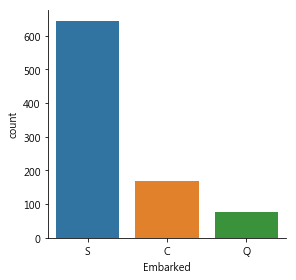

In [23]:
sns.factorplot('Embarked',data=train,kind='count',order=['S','C','Q'])

In [24]:
#Embarked 有2个缺失值，因为'S'值最多，此处以'S'值填充
train['Embarked'] = train['Embarked'].fillna('S')

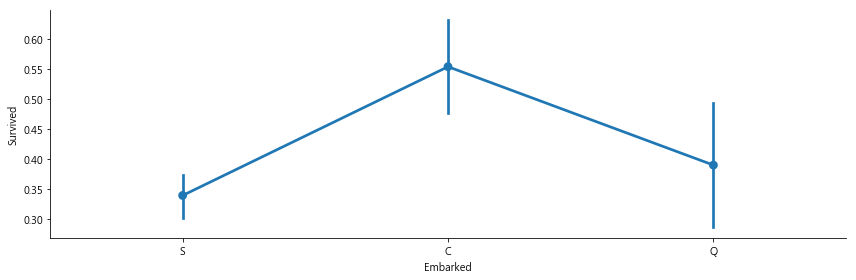

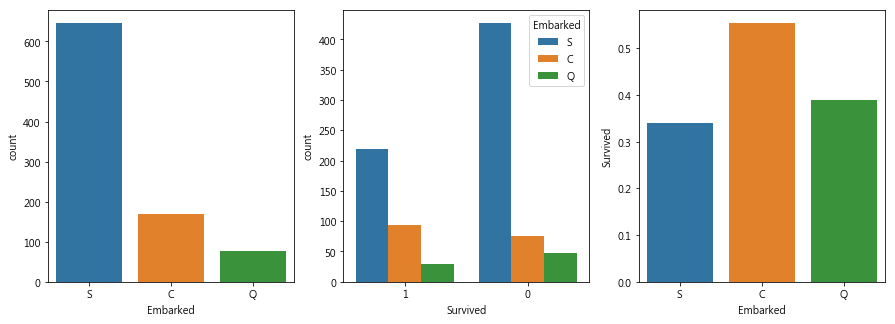

In [25]:
#plot
#分析Embarked与Survived的关系
sns.factorplot('Embarked','Survived', data=train,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

#分析Embarked
sns.countplot(x='Embarked', data=train, ax=axis1)
#分析Embarked与Survived的关系
sns.countplot(x='Survived', hue="Embarked", data=train, order=[1,0], ax=axis2)

#分析Embarked的取值与Survived的关系，算均值，看出‘Q’时，Survive概率最大
embark_perc = train[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

In [26]:
#分析后，对Embarked进行处理
#one-hot编码
embark_dummies_titanic = pd.get_dummies(train['Embarked'])
#embark_dummies_titanic.head()

#'S'的属性对于结果没有太大帮助所以舍弃'S',或者丢弃整个Embarked特征，
#因为结果分析来看此特征对于Survive没有太大影响
#embark_dummies_titanic.drop(['S'], axis=1, inplace=True)
#embark_dummies_titanic.head()

#处理test数据
embark_dummies_test  = pd.get_dummies(test['Embarked'])
#embark_dummies_test.drop(['S'], axis=1, inplace=True)

train = train.join(embark_dummies_titanic)
test = test.join(embark_dummies_test)

train.drop(['Embarked'], axis=1,inplace=True)
test.drop(['Embarked'], axis=1,inplace=True)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q,S
0,0,3,male,22.0,1,0,7.2500,NaN,0,0,1
1,1,1,female,38.0,1,0,71.2833,C85,1,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,0,0,1
3,1,1,female,35.0,1,0,53.1000,C123,0,0,1
4,0,3,male,35.0,0,0,8.0500,NaN,0,0,1


## 1.2 Fare（连续值的处理：计算均值和标准差）

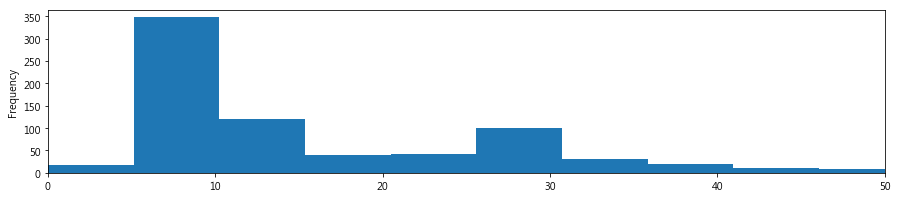

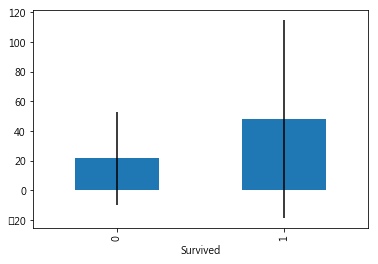

In [27]:
#对于test的fare属性有部分缺失值，用中值补全
test['Fare'].fillna(test['Fare'].median(),inplace=True)

#float to int ？？
train['Fare'] = train['Fare'].astype(int)
test['Fare'] = test['Fare'].astype(int)


# 获得Survive与否下的passenger数据
fare_not_survived = train["Fare"][train["Survived"] == 0]
fare_survived     = train["Fare"][train["Survived"] == 1]

#分别计算均值和标准差
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

#Fare数据
train['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))
avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

## 1.3 Age

orgin
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
------------new value--------------


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count    891.000000
mean      29.573513
std       13.540366
min        0.000000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

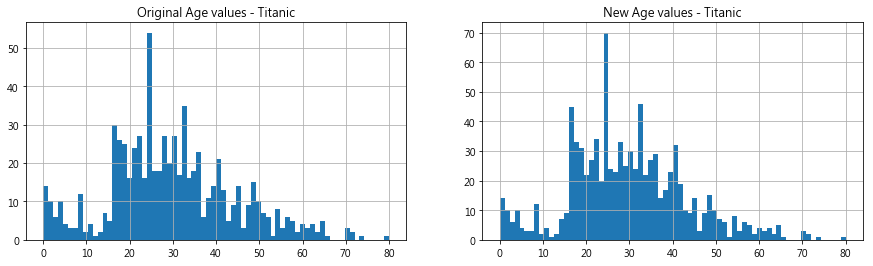

In [28]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')
print("orgin")
print(train['Age'].describe())

#获得train各个指标
average_age_titanic   = train["Age"].mean()
std_age_titanic       = train["Age"].std()
count_nan_age_titanic = train["Age"].isnull().sum()

#获得test各个指标
average_age_test   = test["Age"].mean()
std_age_test       = test["Age"].std()
count_nan_age_test = test["Age"].isnull().sum()

# 随机生成位于 (mean - std) & (mean + std)之间的数

rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

#plot时需要删除所有Nan的数据
train['Age'].dropna().astype(int).hist(bins=70,ax=axis1)

# 用均值和标准差之间的随机数来填充缺失值
train["Age"][np.isnan(train["Age"])] = rand_1
test["Age"][np.isnan(test["Age"])] = rand_2

#转化成整数
train['Age']   = train['Age'].astype(int)
test['Age']    = test['Age'].astype(int)

# plot 新的Age数据
train['Age'].hist(bins=70, ax=axis2)
print('------------new value--------------')
train['Age'].describe()

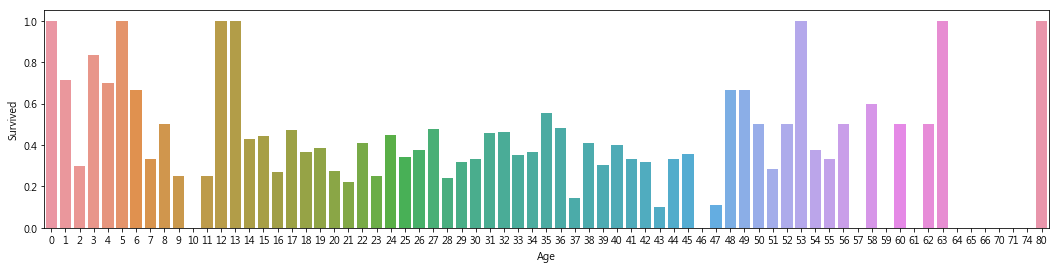

In [29]:
'''
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
'''



fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

## 1.4 Cabin

In [30]:
#缺失过多的值，直接剔除掉
train['Cabin'].describe()

train.drop("Cabin",axis=1,inplace=True)
test.drop("Cabin",axis=1,inplace=True)

## 1.5 Family

d:\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[Text(0,0,'With Family'), Text(0,0,'Alone')]

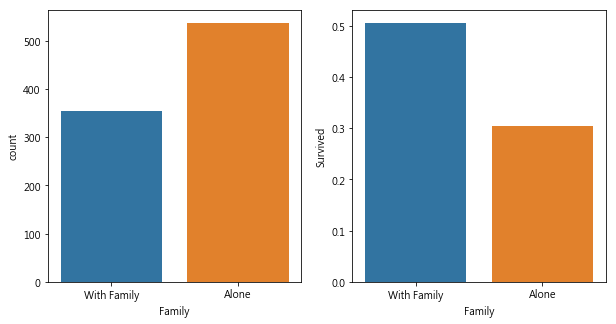

In [31]:
#将SibSp 和 Parch合并成一个feature
#有亲属则设置为1，没有亲属则设置为0
train['Family'] =  train["Parch"] + train["SibSp"]
train['Family'].loc[train['Family'] > 0] = 1
train['Family'].loc[train['Family'] == 0] = 0

test['Family'] =  test["Parch"] + test["SibSp"]
test['Family'].loc[test['Family'] > 0] = 1
test['Family'].loc[test['Family'] == 0] = 0

# drop Parch & SibSp
train = train.drop(['SibSp','Parch'], axis=1)
test    = test.drop(['SibSp','Parch'], axis=1)

#画图分析
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

#family
sns.countplot(x='Family', data=train, order=[1,0], ax=axis1)

#family均值与Survive关系
family_perc = train[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

## 1.6 Sex

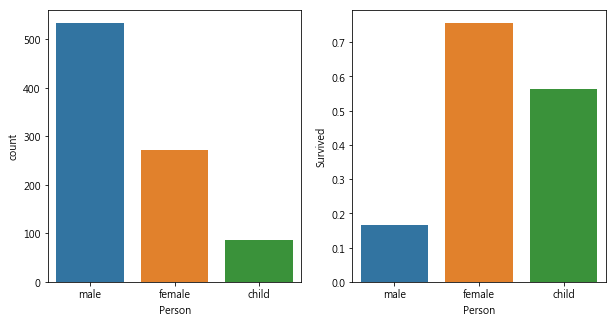

In [32]:
#通过分析，儿童(Age<16) Survival的概率很大，因此sex分为males，females，child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex

#增加person字段来代替sex字段
train['Person'] = train[['Age','Sex']].apply(get_person,axis=1)
test['Person'] = test[['Age','Sex']].apply(get_person,axis=1)

#删除Sex字段
train.drop(['Sex'],axis=1,inplace=True)
test.drop(['Sex'],axis=1,inplace=True)

#将Person字段one-hot编码，鉴于Male对于Survival帮助不大，因此舍去
person_dummies_titanic  = pd.get_dummies(train['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
#person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test['Person'])
person_dummies_test.columns = ['Child','Female','Male']
#person_dummies_test.drop(['Male'], axis=1, inplace=True)

train = train.join(person_dummies_titanic)
test = test.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

#分析Person数据
sns.countplot(x='Person',data=train,ax=axis1)

person_perc  = train[['Person','Survived']].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person',y='Survived',data=person_perc,ax=axis2,order=['male','female','child'])

train.drop(['Person'],axis=1,inplace=True)
test.drop(['Person'],axis=1,inplace=True)

## 1.7 Pclass

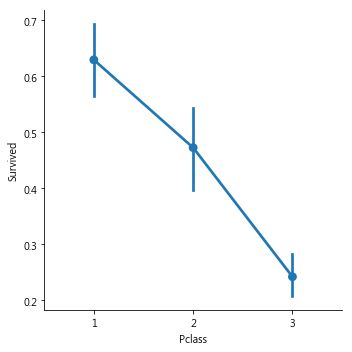

In [33]:
train['Pclass'].describe()
train['Pclass'].head()

sns.factorplot('Pclass','Survived', data=train,size=5)


#class=3 帮助很小，舍去，对Pclass进行one-hot编码
pclass_dummies_titanic  = pd.get_dummies(train['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
#pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
#pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

train.drop(['Pclass'],axis=1,inplace=True)
test.drop(['Pclass'],axis=1,inplace=True)

train = train.join(pclass_dummies_titanic)
test    = test.join(pclass_dummies_test)

## 二.生成训练和测试的数据和label

In [34]:
X_train = train.drop('Survived',axis=1)
Y_train = train['Survived']
X_test = test.drop(['PassengerId'],axis=1).copy()

# 三.Decision Tree



主要是利用[sklearn.tree.DecisionTreeClassifier][1]来进行测验
>参数介绍：
>
>**1.criterion :** 衡量特征选择的标准，**默认是基尼指数：gini**
>
>**2.splitter :** 划分节点时，划分的方式，**默认是最优划分：best**
>
>**3.max_features :** 建树时最大的特征数，即中间节点的个数，**默认是：None** 即max_features=n_features。一定程度上缓解过拟合
>
>**4.max_depth : **树的最大深度，**默认是None**，即正常的根据特征建树直到所有节点只含一个样本或者含有的样本数量少于最小的数量（min_samples_split）为止。
>
>**5.min_samples_split :**当当前节点的样本数大于min_samples时，继续划分，**默认min_samples_split =2**
>
>**6.min_samples_leaf :** 每个叶子节点所含的最少的样本数量，**默认是1**
>
>**7.min_weight_fraction_leaf :** 对于每一个叶子节点而言，所有样本数据到达这个叶子节点所需的权重之和的最小值，**默认是0.**
>
>**8.max_leaf_nodes :**以BFS方式生成树，树的最大叶子节点数，即BFS到叶子节点时，要是树的叶子节点总数=max_leaf_nodes时，就结束。**默认None**，即没有限制。
>
>**9.class_weight :** 对于多分类任务而言，输出有n类，则需要用class_weight来设置每一类所占的权重，**默认：None**，即所有类权重均为1。
>
>**10.random_state :** 随机状态，不太清楚作用是什么，splitter=‘random’时起作用？？默认是None，即np.random生成
>
>**11.min_impurity_split :**用来做early-stop的，当节点的impurity（纯度？？混乱度？？）值小于min_impurity_split 时，不再进行继续划分。**默认是1e-7**
>
>**12.presort : **对于数据集进行排序，目的是更加快速的建树，当数据集过大的时候不可取，因为排序所需的时间成本过大。**默认：False**，即不进行排序。

  [1]: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

## 3.1 Decision Tree 
>参数全部默认

In [35]:
decisionTree1 = DecisionTreeClassifier()

decisionTree1.fit(X_train, Y_train)

Y_decisionTree_pred1 = decisionTree1.predict(X_test)

decisionTree1.score(X_train, Y_train)

0.9663299663299664

## 3.2 Decision Tree 
>criterion = 'entropy'

In [36]:
decisionTree2 = DecisionTreeClassifier(criterion = 'entropy')

decisionTree2.fit(X_train, Y_train)

Y_decisionTree_pred2 = decisionTree2.predict(X_test)

decisionTree2.score(X_train, Y_train)

0.9663299663299664

## 3.3 Decision Tree  
>splitter='random'

In [37]:
decisionTree3 = DecisionTreeClassifier(splitter='random')

decisionTree3.fit(X_train, Y_train)

Y_decisionTree_pred3 = decisionTree2.predict(X_test)

decisionTree3.score(X_train, Y_train)

0.9663299663299664

## 3.4 Decision Tree 
>min_samples_split=4

In [38]:
decisionTree4 = DecisionTreeClassifier(min_samples_split=4)

decisionTree4.fit(X_train, Y_train)

Y_decisionTree_pred4 = decisionTree4.predict(X_test)

decisionTree4.score(X_train, Y_train)

0.9427609427609428

## 四.ExtraTreeClassifier
>Decision Tree 的一种特例，详见[sklearn.tree.ExtraTreeClassifier][1]


  [1]: http://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html#sklearn.tree.ExtraTreeClassifier

In [39]:
extraDecisionTree = ExtraTreeClassifier()

extraDecisionTree.fit(X_train, Y_train)

Y_extraDecisionTree_pred = extraDecisionTree.predict(X_test)

extraDecisionTree.score(X_train, Y_train)

0.9663299663299664

# 五.Submission

In [40]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_decisionTree_pred1
    })
submission.to_csv('decisionTree_pred1_titanic.csv', index=False)

In [41]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_decisionTree_pred2
    })
submission.to_csv('decisionTree_pred2_titanic.csv', index=False)

In [42]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_decisionTree_pred3
    })
submission.to_csv('decisionTree_pred3_titanic.csv', index=False)

In [43]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_decisionTree_pred4
    })
submission.to_csv('decisionTree_pred4_titanic.csv', index=False)

In [44]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_extraDecisionTree_pred
    })
submission.to_csv('extraDecisionTree_pred_titanic.csv', index=False)

# 六.Submission 结果分析

    |方法  |test auc |  
    |-------- |:----: |
    |decisionTree1 |0.72727 |  
    |decisionTree2 |0.73684|   
    |decisionTree3 |0.73684|  
    |decisionTree4 |0.72249|   
    |extraDecisionTree|0.70813|  

>显然训练的时候过拟合了；random的情况下，可以一定程序的缓解过拟合，故random的test值较高